In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from upsetplot import UpSet, from_contents
import seaborn as sns
from matplotlib_venn import venn2
from neo4j import GraphDatabase
import neo4j
import pandas as pd
import re
import argparse
plt.rcParams['svg.fonttype'] = 'none'
sns.set_theme(font_scale=1.4, style='whitegrid')

In [2]:
uri = "bolt://127.0.0.1:7687"
username = "neo4j"
password = "neo4jpassword"
driver = GraphDatabase.driver(uri, auth=(username, password))
driver.verify_connectivity()

In [3]:
query_node_labels = f"""
MATCH (n)
WITH DISTINCT labels(n) AS label, count(n) AS count
RETURN label, count
ORDER BY count DESC
"""
query_relationship_types = f"""
MATCH ()-[r]->()
RETURN type(r) AS relationshipType, count(r) AS count
ORDER BY count DESC
"""

In [4]:
node_labels= driver.execute_query(
        query_node_labels,
        database_="neo4j",
        result_transformer_=neo4j.Result.to_df
    )
relationship_type = driver.execute_query(
        query_relationship_types,
        database_="neo4j",
        result_transformer_=neo4j.Result.to_df
    )

In [ ]:
# node_labels.drop(node_labels.index[-1], axis=0, inplace=True)

/tmp/ipykernel_18623/1494902541.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=node_labels, y="count", x="selected_label", palette=custom_palette, ax=ax1)
/tmp/ipykernel_18623/1494902541.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=node_labels, y="count", x="selected_label", palette=custom_palette, ax=ax2)


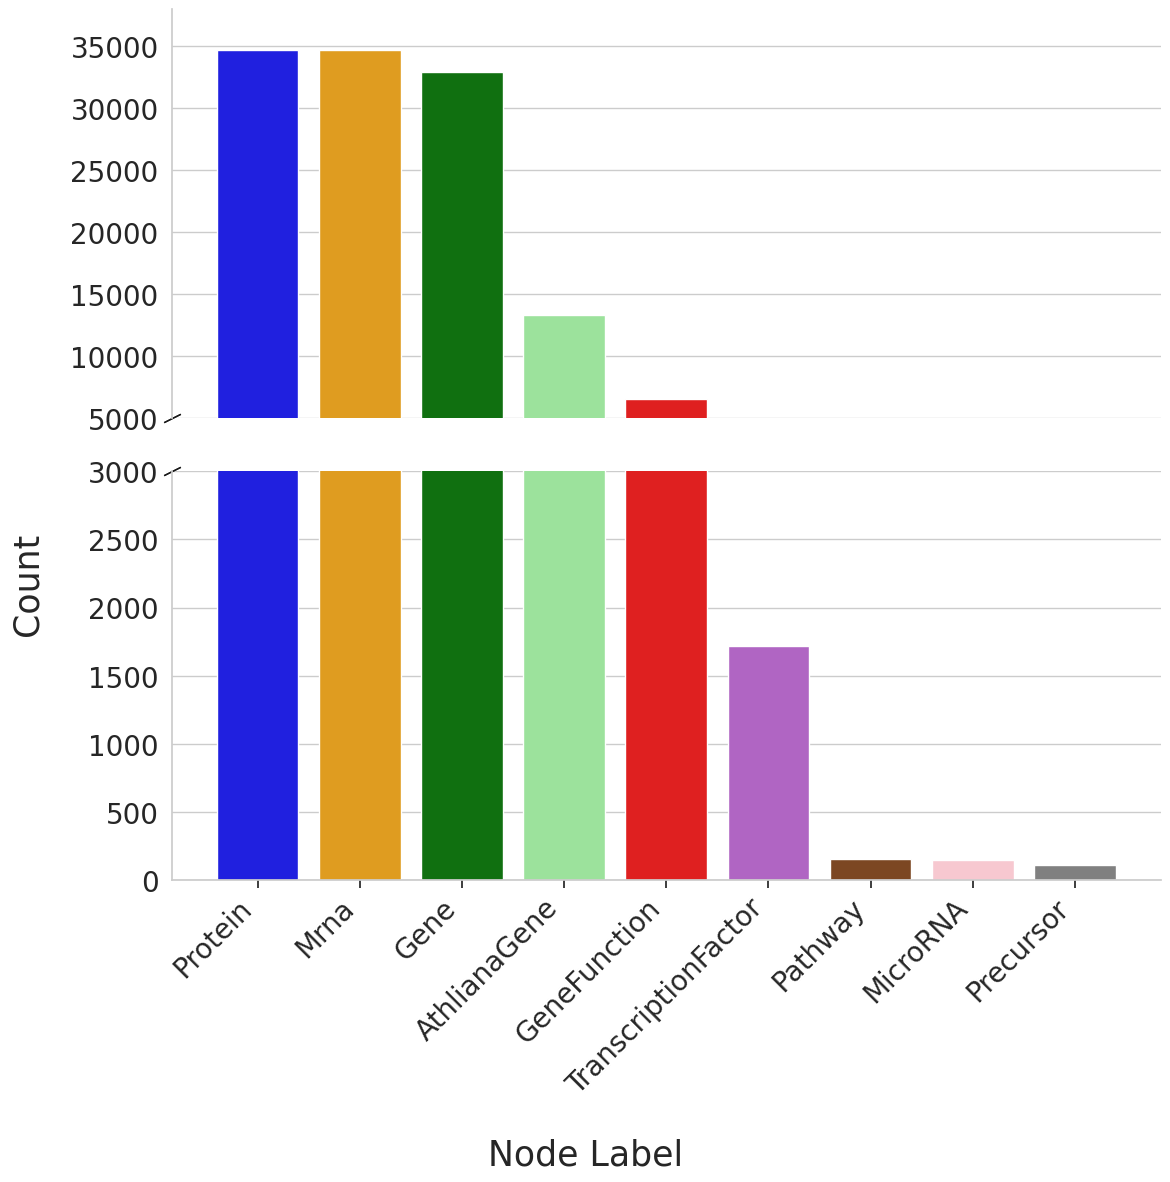

In [5]:
selected_labels = ['Protein', 'Mrna', 'Gene','AthlianaGene','GeneFunction','TranscriptionFactor','Pathway','MicroRNA','Precursor']
# Select the last label from the list
node_labels['label'] = node_labels['label'].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else x)
node_labels['selected_label'] = selected_labels
# Sort values for better visualization
node_labels = node_labels.sort_values(by="count", ascending=False)


custom_palette = {
    'Protein': 'blue',
    'Mrna': 'orange',
    'Gene': 'green',
    'AthlianaGene': 'lightgreen',
    'GeneFunction': 'red',
    'TranscriptionFactor': 'mediumorchid',
    'Pathway': 'saddlebrown',
    'MicroRNA': 'pink',
    'Precursor': 'gray',
}

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
fig.subplots_adjust(hspace=0.05)
# Create a regular barplot
sns.barplot(data=node_labels, y="count", x="selected_label", palette=custom_palette, ax=ax1)
sns.barplot(data=node_labels, y="count", x="selected_label", palette=custom_palette, ax=ax2)

ax1.set_ylim(5000, 38000)  
ax2.set_ylim(0, 3000)  

ax1.spines.bottom.set_visible(False)
ax1.spines.right.set_visible(False)
ax2.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax2.tick_params(labelsize = 20)
ax1.tick_params(labelsize = 20)
# Labels and title
ax2.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
fig.supylabel("Count", fontsize=25)
fig.supxlabel("Node Label", fontsize=25)

for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

d = .5  
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 0], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 1], transform=ax2.transAxes, **kwargs)
# Show plot
plt.tight_layout()
plt.savefig('./Fig1_B.svg', format='svg')
plt.show()


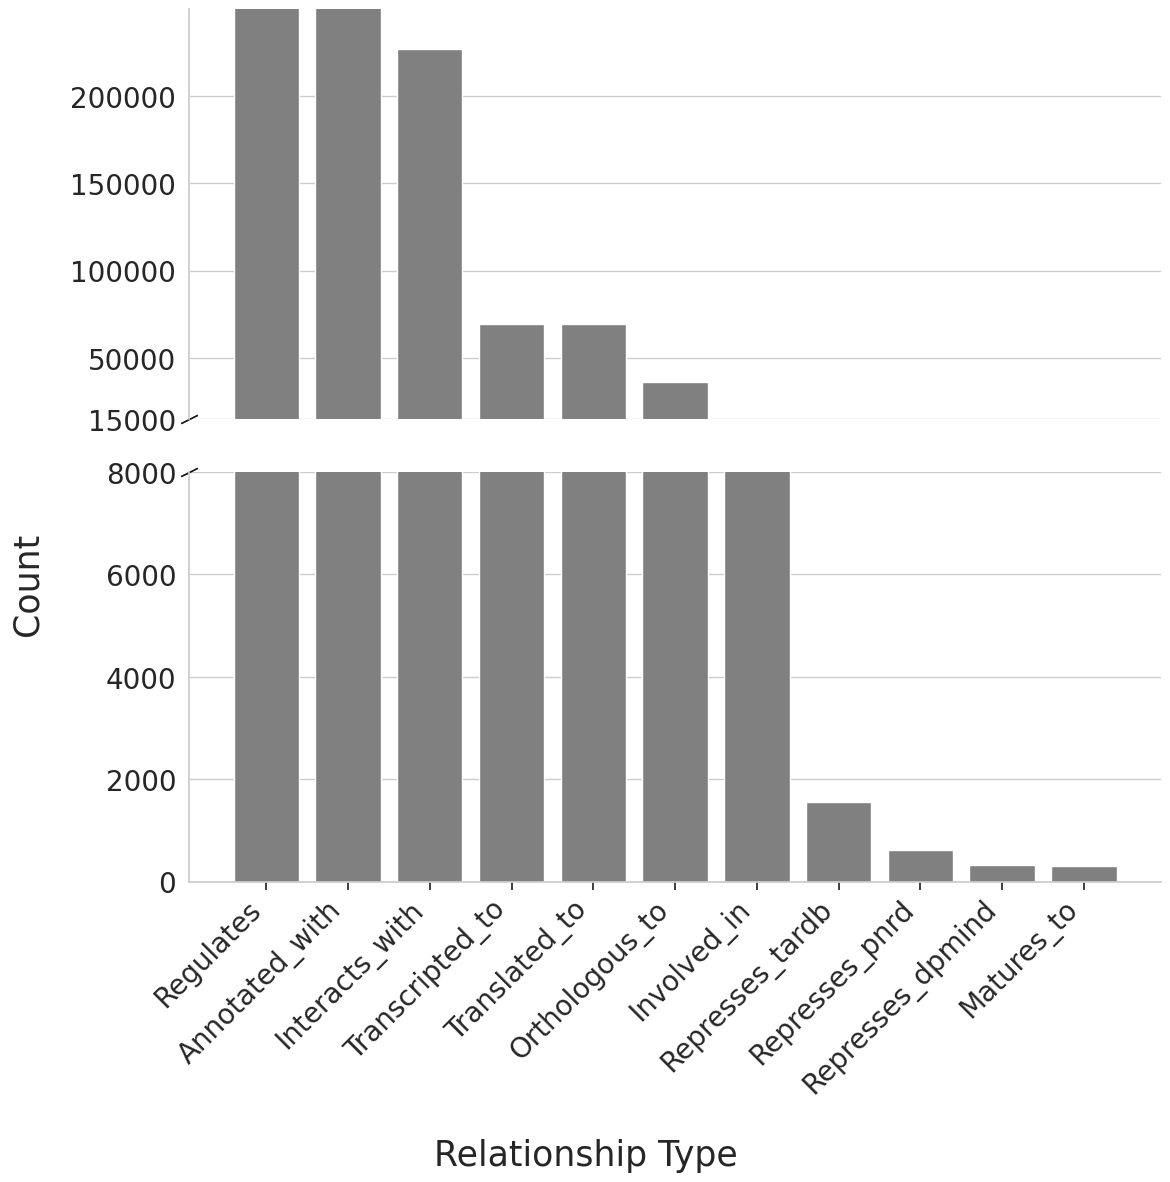

In [6]:
# Sort values for better visualization
relationship_type = relationship_type.sort_values(by="count", ascending=False)

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
fig.subplots_adjust(hspace=0.05)
# Create a regular barplot
sns.barplot(data=relationship_type, y="count", x="relationshipType", ax=ax1, color='grey')
sns.barplot(data=relationship_type, y="count", x="relationshipType", ax=ax2, color='grey')

ax1.set_ylim(15000, 250000)  
ax2.set_ylim(0, 8000)  

ax1.spines.bottom.set_visible(False)
ax1.spines.right.set_visible(False)
ax2.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax2.tick_params(labelsize = 20)
ax1.tick_params(labelsize = 20)
ax1.set_yticks([15000, 50000, 100000, 150000, 200000])
ax2.set_yticks([0, 2000, 4000, 6000, 8000]) 

# Labels and title
ax2.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
fig.supylabel("Count", fontsize=25)
fig.supxlabel("Relationship Type", fontsize=25)

for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

d = .5  
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 0], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 1], transform=ax2.transAxes, **kwargs)
# Show plot
plt.tight_layout()
plt.savefig('./Fig1_C.svg', format='svg')
plt.show()

In [7]:
relationship_type

,relationshipType,count
0,Regulates,482776
1,Annotated_with,267480
2,Interacts_with,226944
3,Transcripted_to,69376
4,Translated_to,69376
5,Orthologous_to,35830
6,Involved_in,14916
7,Represses_tardb,1554
8,Represses_pnrd,616
9,Represses_dpmind,318


In [10]:
relationship_type['count'].sum()

1169480

In [ ]:
node_labels

,label,count,selected_label
0,Polypeptide,34688,Protein
1,RnaProduct,34688,Mrna
2,Entity,32971,Gene
3,AthalianaGene,13342,AthlianaGene
4,GeneFunction,6551,GeneFunction
5,TranscriptionFactor,1717,TranscriptionFactor
6,BiologicalProcessOrActivity,159,Pathway
7,ChemicalEntity,147,MicroRNA
8,Precursor,112,Precursor


In [11]:
node_labels['count'].sum()

124375